In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD

import sympy
from sympy import diff, symbols, cos, sin, tan

from scipy.optimize import minimize
%matplotlib inline

Задание 1
=====
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))


a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [3]:
def angle_( a, b ):
    """
    Подсчет угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.arccos(np.dot( a, b ) / ( aLength * bLength )) * 360 / 2 / np.pi

In [4]:
for i in range(len(raitings)):
    angle = 90
    user_like = -1
    for j in range(len(raitings)):
        if i==j:
            continue
        if angle_(raitings[i], raitings[j]) < angle:
            angle = angle_(raitings[i], raitings[j])
            user_like = raitings[j]
    print("Для пользователя", raitings[i], "\nпохожий", user_like, "\n")

Для пользователя [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] 
похожий [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] 

Для пользователя [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] 
похожий [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] 

Для пользователя [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] 
похожий [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] 

Для пользователя [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] 
похожий [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] 

Для пользователя [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] 
похожий [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] 

Для пользователя [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] 
похожий [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] 

Для пользователя [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] 
похожий [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] 

Для пользователя [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] 
похожий [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] 

Для пользователя [ 2  7  7  6 10  6  8  9  8  6 10  1 

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Можно использовать SVD метод 

In [5]:
svd = TruncatedSVD(n_components=5)
new_raitings = svd.fit_transform(raitings)
new_raitings

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [8]:
x = symbols('x') 
fx = (tan(sin(x)+cos(2*x+3)))**2
dfdx = diff(fx)
dfdx

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [9]:
diff(fx).subs(x,1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

$f = 2* tan(sin(x)+cos(2*x+3))* tan(sin(x)+cos(2*x+3))$
$f = 2* tan(sin(x)+cos(2x+3))*(1+tan^2(sin(x)+cos(2x+3)))*(cos(x)-2*sin(2x+3)$

При $x_0$ = 1

$f = 2* tan(sin(1)+cos(2*1+3))*(1+tan^2(sin(1)+cos(2*1+3)))*(cos(1)-2*sin(2*1+3)$

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [45]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [46]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [47]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

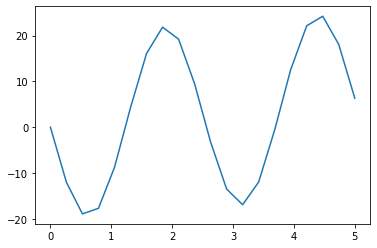

In [48]:
plt.plot(x, fx)
plt.show()

In [49]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [56]:
res = minimize(error, [3,-3], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
res

Optimization terminated successfully.
         Current function value: 0.000139
         Iterations: 45
         Function evaluations: 91


 final_simplex: (array([[ 2.9999999 , -2.49999979],
       [ 2.9999996 , -2.50000014],
       [ 3.00000077, -2.49999986]]), array([0.00013904, 0.00014849, 0.0002241 ]))
           fun: 0.000139043530501759
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 45
        status: 0
       success: True
             x: array([ 2.9999999 , -2.49999979])

In [74]:
print('Оптимальные параметры: \na = {a:.2f}, \nb = {b:.2f}'.format(a=res.x[0],b=res.x[1]))


Оптимальные параметры: 
a = 3.00, 
b = -2.50


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [31]:
var = np.random.random(20)
var

array([0.01849475, 0.23873952, 0.13301867, 0.91713251, 0.09263084,
       0.29580179, 0.24515546, 0.49192875, 0.01920705, 0.42045602,
       0.34289278, 0.7251109 , 0.73648182, 0.59831548, 0.98004491,
       0.79743505, 0.01003003, 0.82700939, 0.82635816, 0.51243965])

In [35]:
n = 50
sample = 1000

mean_array = np.array([])

for i in range(sample):
    sample_iter = np.random.choice(var, n)
    mean_array = np.append(mean_array, sample_iter.mean())

Text(0.5, 0, '$x$')

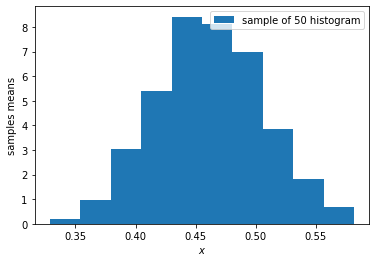

In [36]:
label_1 = 'sample of ' + str(n) + ' histogram'
plt.hist(mean_array, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [37]:
# python

array = np.array([[1, 4],
                  [1, 1]])

In [43]:
j, m = np.linalg.eig(array)
print('Собственные значения: \n',j, '\n', 'Собственные вектора соответственно: \n',m)

Собственные значения: 
 [ 3. -1.] 
 Собственные вектора соответственно: 
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Матрица
\begin{pmatrix}
(1-x)&   4\\
1 & (1-x)
\end{pmatrix}
 
$(1-x)*(1-x)-4*1=0$

$X^2-2*x-3=0$

По Виета: 

$x_1 = 3$

$x_2 = -1$

-----
При $x_1 = 3$

$-2x+4y = 0$

$x -2y = 0$

--> x=2y
вектор [2:1]

----
При $x_2 = -1$

$2x+4y = 0$

$x +2y = 0$

--> x=-2y
вектор [-2:1]

